## Clustering

In [1]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import make_blobs

# import clustering algs
from sklearn.cluster import KMeans, MeanShift
from sklearn.model_selection import train_test_split

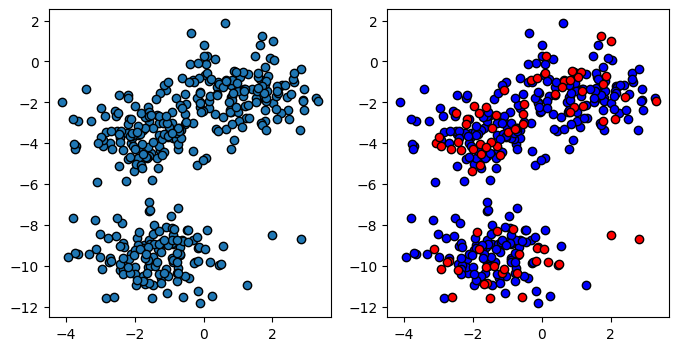

In [3]:
X , y = make_blobs(n_samples = 400, n_features = 2, random_state=2) #, centers = clusters
#solo vamos a usar 'y' para unas funciones de abajo ari y ami
X_train, X_test, _, y_test = train_test_split(X, y, test_size= 0.2, random_state=1)

_, axes = plt.subplots(1, 2, figsize = (8,4))
axes[0].scatter( X[:, 0], X[:, 1], marker ='o', edgecolors='k')
axes[1].scatter( X_train[:, 0], X_train[:, 1], c='b', edgecolors='k')
axes[1].scatter( X_test[:, 0], X_test[:, 1], c='r', edgecolors='k')
plt.show()

In [ ]:
# import decision boundaries function


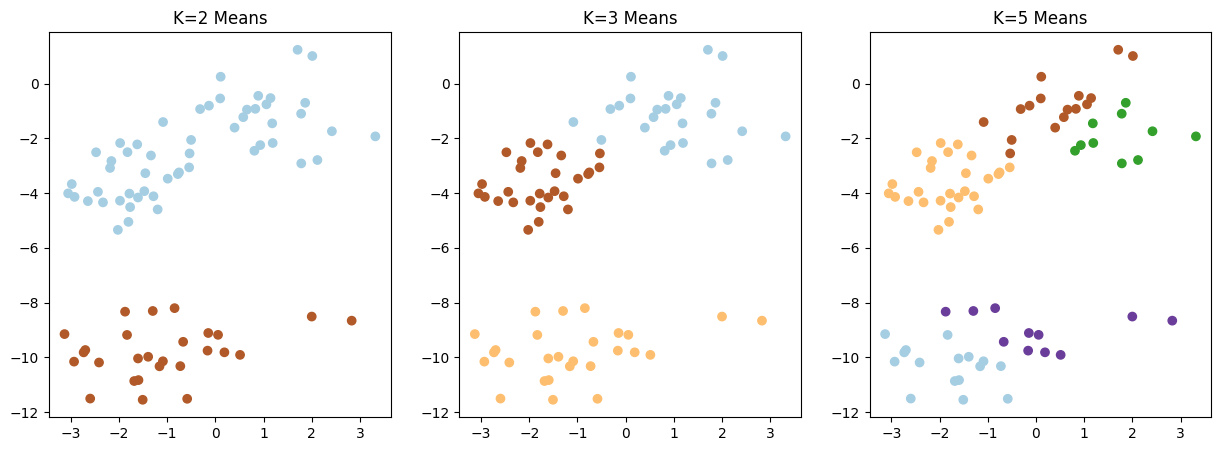

In [4]:
models = [ KMeans(n_clusters=2), KMeans(n_clusters=3), KMeans(n_clusters=5)]
names = ["K=2 Means", "K=3 Means", "K=5 Means"]

_, axes = plt.subplots(1, 3, figsize = (15,5))
predictions = {}

# fit the model
for model, name, ax in zip(models, names, axes):
    # Instance and train
    model.fit(X_train)

    # Predictions on test set
    predictions[name] = model.predict(X_test)

    # Plot everything
    ax.scatter(X_test[:,0], X_test[:,1], c= predictions[name], cmap='Paired')
    ax.set_title(name)

plt.show()

## Metrics

The metrics module [Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) de sklearn

In [5]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

In [6]:
## Scores for training data

for name in names :
  print ("########----- Results for {0} -----########".format( name ))
  ari = adjusted_rand_score( y_test , predictions[name] )
  ami = adjusted_mutual_info_score( y_test , predictions[name] )
  sil = silhouette_score(X_test , predictions[name])
  ##--------------
  print("-- ARI --\t -- AMI --\t -- SIL --")
  print(f"  {ari:.3f}  \t   {ami:.3f}  \t   {sil:.3f}  \t")

########----- Results for K=2 Means -----########
-- ARI --	 -- AMI --	 -- SIL --
  0.577  	   0.734  	   0.657  	
########----- Results for K=3 Means -----########
-- ARI --	 -- AMI --	 -- SIL --
  0.927  	   0.916  	   0.600  	
########----- Results for K=5 Means -----########
-- ARI --	 -- AMI --	 -- SIL --
  0.666  	   0.746  	   0.433  	


## In real data

In [7]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import load_digits

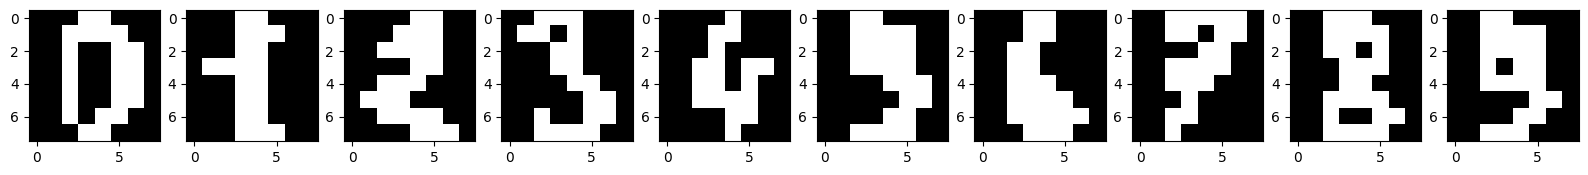

In [8]:
digits = load_digits()
images = (digits.images > 6) * 1.0

_, axes = plt.subplots(1,10, figsize=(20,4))
for i, ax in enumerate(axes):
  ax.imshow(images[i].reshape(8,8), cmap="gray");

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

In [13]:
data = digits.data
targets = digits.target

X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.2, random_state=1)

In [17]:
models = [ KMeans(n_clusters=2), KMeans(n_clusters=3), KMeans(n_clusters=5)]
names = ["K=2 Means", "K=3 Means", "K=5 Means"]

predictions = {}

for model, name, ax in zip(models, names, axes):
    model.fit(X_train)
    predictions[name] = model.predict(X_test)

for name in names:
    print("########----- Results for {0} -----########".format(name))
    ari = adjusted_rand_score(y_test, predictions[name])
    ami = adjusted_mutual_info_score(y_test, predictions[name])
    sil = silhouette_score(X_test, predictions[name])
    print("-- ARI --\t -- AMI --\t -- SIL --")
    print(f"  {ari:.3f}  \t   {ami:.3f}  \t   {sil:.3f}  \t")


########----- Results for K=2 Means -----########
-- ARI --	 -- AMI --	 -- SIL --
  0.110  	   0.229  	   0.116  	
########----- Results for K=3 Means -----########
-- ARI --	 -- AMI --	 -- SIL --
  0.244  	   0.426  	   0.132  	
########----- Results for K=5 Means -----########
-- ARI --	 -- AMI --	 -- SIL --
  0.350  	   0.520  	   0.144  	
